In [1]:
sys.path.append("..")
import os
import utils
import plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import matplotlib.patches as mpatches
import seaborn as sns
from collections import defaultdict
import os
from matplotlib import font_manager as fm, rcParams

In [2]:
def read_all_results(dir_path):
    paths = os.listdir(dir_path)
    last_gens = []
    objectives = []
    random = []
    for i in range(len(paths)):
        path = dir_path + paths[i]
        try:
            params = utils.load_json(f'{path}/run_params.json')
            last_gen = sorted(map(lambda x: x.split("_"), 
                            os.listdir(f"{path}/individuals/")), 
                            key=lambda x: int(x[1].split(".")[0]))[-1][-1][:-4]
            last_gens.append(int(last_gen))
            objectives.append(params['objective'])
            random.append(params['random_individuals'])
            print(f"{i+1}: Path: {paths[i]}, last generation: {int(last_gen):>3}, objective: {params['objective']:>8}, random: {params['random_individuals']:>2}")
        except:
            continue
    return paths, last_gens, objectives, random

In [3]:
dir_path = "../results/new/"
paths, last_gens, objectives, random = read_all_results(dir_path)

1: Path: GA_2021_06_06_13_15_12, last generation: 148, objective: infected, random:  1
2: Path: GA_2021_06_06_13_11_53, last generation: 110, objective: weighted, random:  0
3: Path: GA_2021_06_06_13_15_38, last generation: 144, objective:      yll, random:  1
4: Path: GA_2021_06_07_09_43_05, last generation:  82, objective:   deaths, random:  0
5: Path: GA_2021_06_07_09_48_01, last generation:  75, objective:      yll, random:  0
6: Path: GA_2021_06_06_13_13_38, last generation: 104, objective: infected, random:  0
7: Path: GA_2021_06_06_17_23_47, last generation: 136, objective: weighted, random:  1
8: Path: GA_2021_06_07_09_53_00, last generation:  59, objective:   deaths, random:  1


In [4]:
def set_run_params(run_nr):
    objective = objectives[run_nr-1]
    rand = random[run_nr-1]
    run_name = f"{objective.upper() if objective == 'yll' else objective} ({'non-seeded' if rand else 'seeded'})"
    return run_nr, objective, rand, run_name

run_1, objective_1, random_1, run_name_1 = set_run_params(4)
run_2, objective_2, random_2, run_name_2 = set_run_params(6)
run_3, objective_3, random_3, run_name_3 = set_run_params(2)
run_4, objective_4, random_4, run_name_4 = set_run_params(5)
run_5, objective_5, random_5, run_name_5 = set_run_params(8)
run_6, objective_6, random_6, run_name_6 = set_run_params(1)
run_7, objective_7, random_7, run_name_7 = set_run_params(7)
run_8, objective_8, random_8, run_name_8 = set_run_params(3)

max_generations = 100

## Generation Means

In [5]:
def get_result_means(run_nr):
    generation_scores = os.listdir(dir_path+paths[run_nr-1]+"/final_scores/")
    final_scores = []
    for score in sorted(generation_scores, key=lambda x: int(x.split("_")[2][:-4])):
        final_scores.append(utils.read_pickle(dir_path+paths[run_nr-1]+"/final_scores/"+score))

    generation_means = defaultdict(list)
    for gen_scores in final_scores:
        gen_individual_means = defaultdict(list)
        for individual in gen_scores.keys():
            for objective, scores in gen_scores[individual].items():
                gen_individual_means[objective].append(np.mean(scores))
        for objective, scores in gen_individual_means.items():
            generation_means[objective].append(np.mean(scores))
    generation_means = dict(generation_means)
    result_means = pd.DataFrame(generation_means)
    result_means.index.rename("generation", inplace=True)
    return result_means, final_scores

In [6]:
result_means_1, final_scores_1 = get_result_means(run_1)
result_means_2, final_scores_2 = get_result_means(run_2)
result_means_3, final_scores_3 = get_result_means(run_3)
result_means_4, final_scores_4 = get_result_means(run_4)
result_means_5, final_scores_5 = get_result_means(run_5)
result_means_6, final_scores_6 = get_result_means(run_6)
result_means_7, final_scores_7 = get_result_means(run_7)
result_means_8, final_scores_8 = get_result_means(run_8)

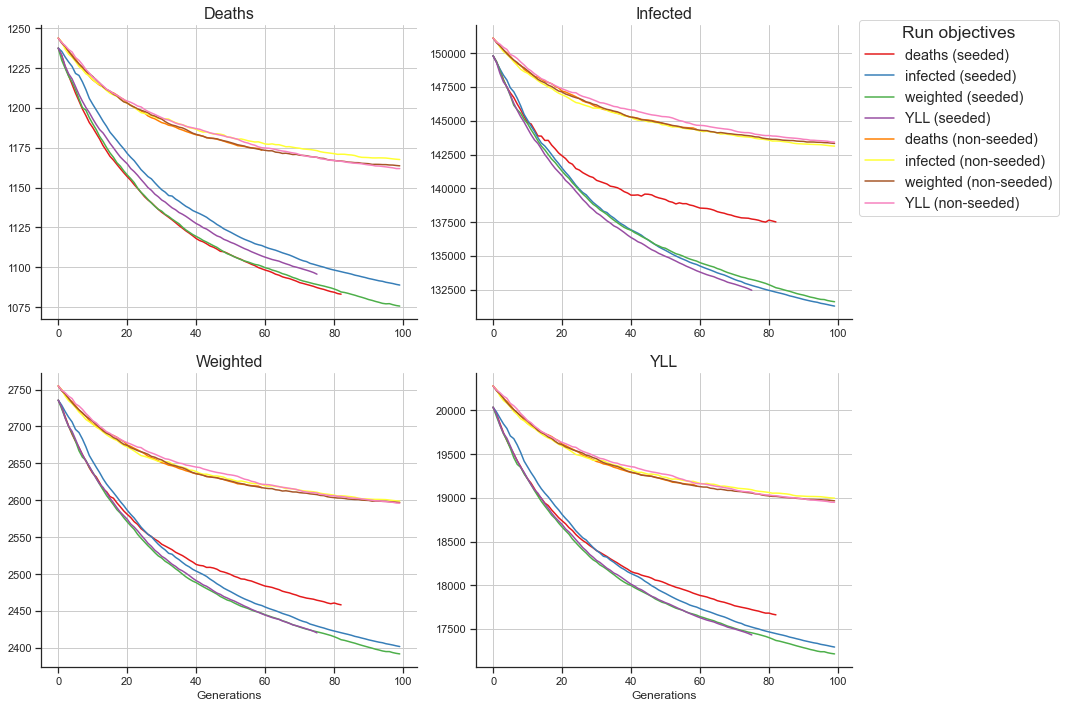

In [46]:
sns.set(font_scale=1)
sns.set_style('ticks')
colors = sns.color_palette('Set1')
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(15,10))
for i, main_objective in enumerate(["deaths", "infected", "weighted", "yll"]):
    ax = axs[i//2][i%2]
    result_means_1[main_objective][:max_generations].plot(label=run_name_1, color=colors[0], ax=ax)
    result_means_2[main_objective][:max_generations].plot(label=run_name_2, color=colors[1], ax=ax)
    result_means_3[main_objective][:max_generations].plot(label=run_name_3, color=colors[2], ax=ax)
    result_means_4[main_objective][:max_generations].plot(label=run_name_4, color=colors[3], ax=ax)
    result_means_5[main_objective][:max_generations].plot(label=run_name_5, color=colors[4], ax=ax)
    result_means_6[main_objective][:max_generations].plot(label=run_name_6, color=colors[5], ax=ax)
    result_means_7[main_objective][:max_generations].plot(label=run_name_7, color=colors[6], ax=ax)
    result_means_8[main_objective][:max_generations].plot(label=run_name_8, color=colors[7], ax=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid()
    if i > 1: 
        ax.set_xlabel("Generations", fontsize=12)
    else:
        ax.set_xlabel("")
    ax.set_title(main_objective.upper() if main_objective == "yll" else main_objective.capitalize(), fontsize=16)
plt.legend(bbox_to_anchor=(1.57, 2.22), fontsize='large', title="Run objectives", title_fontsize='x-large')
plt.tight_layout()
plt.subplots_adjust(hspace=0.18)
plt.savefig("../plots/GA/mean_generation_score.png", dpi=200)
plt.show()

## Best individual

In [8]:
def get_best_individual_results(run_nr, final_scores):
    filenames = os.listdir(dir_path+paths[run_nr-1]+"/best_individuals/")
    best_individuals = []
    for individual in sorted(filenames, key=lambda x: int(x.split("_")[2][:-4])):
        best_individuals.append(utils.read_pickle(dir_path+paths[run_nr-1]+"/best_individuals/"+individual))

    best_individual_scores = {gen: {"individual": None,"deaths":None, "infected":None, "weighted":None, "yll":None} for gen in range(len(best_individuals))}
    for i, individual in enumerate(best_individuals):
        best_individual_scores[i]["individual"] = individual
        for obj in ["deaths", "infected", "weighted", "yll"]:
            best_individual_scores[i][obj] = np.mean(final_scores[i][individual.ID][obj])
    results = pd.DataFrame(dict(best_individual_scores)).T
    results.index.rename("generation", inplace=True)
    return results

In [9]:
results_1 = get_best_individual_results(run_1, final_scores_1)
results_2 = get_best_individual_results(run_2, final_scores_2)
results_3 = get_best_individual_results(run_3, final_scores_3)
results_4 = get_best_individual_results(run_4, final_scores_4)

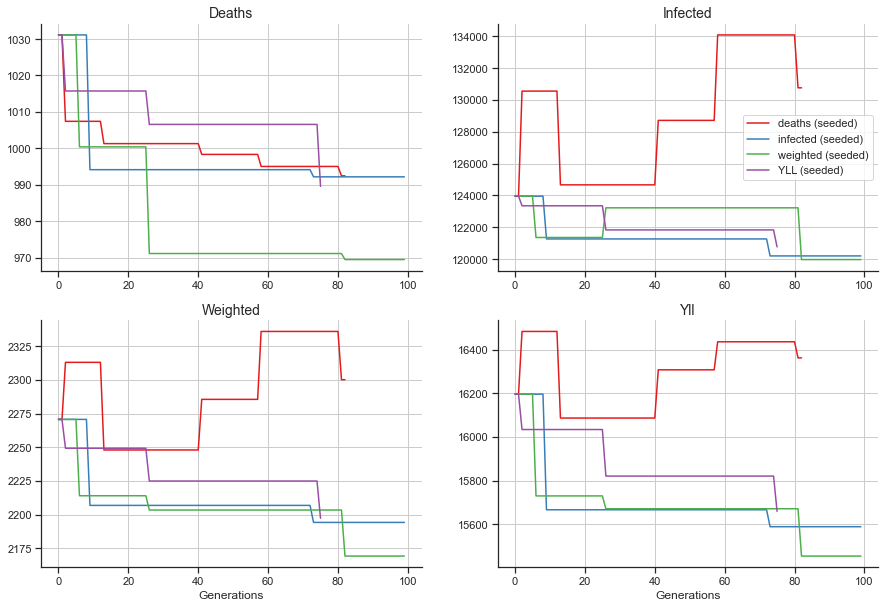

In [10]:
sns.set(font_scale=1)
sns.set_style('ticks')
colors = sns.color_palette('Set1')
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(15,10))
for i, main_objective in enumerate(["deaths", "infected", "weighted", "yll"]):
    ax = axs[i//2][i%2]
    results_1[main_objective][:max_generations].plot(label=run_name_1, color=colors[0], ax=ax)
    results_2[main_objective][:max_generations].plot(label=run_name_2, color=colors[1], ax=ax)
    results_3[main_objective][:max_generations].plot(label=run_name_3, color=colors[2], ax=ax)
    results_4[main_objective][:max_generations].plot(label=run_name_4, color=colors[3], ax=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if i == 1: ax.legend()
    ax.grid()
    if i > 1: 
        ax.set_xlabel("Generations", fontsize=12)
    else:
        ax.set_xlabel("")
    ax.set_title(main_objective.capitalize(), fontsize=14)
plt.show()

# Trend strategies

In [11]:
for i, name in enumerate([run_name_1, run_name_2, run_name_3, run_name_4]):
    print(f"Run {i+1}: {name}")

Run 1: deaths (seeded)
Run 2: infected (seeded)
Run 3: weighted (seeded)
Run 4: YLL (seeded)


In [12]:
generation = 49
pop_1 = utils.read_pickle(f'{dir_path}{paths[run_1-1]}/individuals/individuals_{generation}.pkl')
pop_2 = utils.read_pickle(f'{dir_path}{paths[run_2-1]}/individuals/individuals_{generation}.pkl')
pop_3 = utils.read_pickle(f'{dir_path}{paths[run_3-1]}/individuals/individuals_{generation}.pkl')
pop_4 = utils.read_pickle(f'{dir_path}{paths[run_4-1]}/individuals/individuals_{generation}.pkl')

In [13]:
def plot_trend_policy_weights(ETS, ylim):
    policies = ("No vaccines", "Population-based", "Infected-based", "Age-based", "Contact-based")
    sns.set(font_scale=1.1)
    sns.set_style("ticks")
    colors = sns.color_palette('husl')
    fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,10))
    for i, main_objective in enumerate([run_name_1, run_name_2, run_name_3, run_name_4]):
        ax = axs[i//2][i%2]
        pd.DataFrame(dict(zip(policies,ETS[i])), index=["Percent"]).plot(kind='bar', color=colors, width=3, ax=ax, legend=False)
        for rect in ax.patches:
            height = rect.get_height()
            width = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()
            label_text = f'{height:.2f}%'
            label_x = x + width / 2 + 0.01
            label_y = y + height + 0.01
            if width > 0:
                ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.grid()
        ax.get_xaxis().set_visible(False)
        ax.set_ylim(0, ylim)
        ax.set_title(f"Run objective: {main_objective.capitalize()}", fontsize=14)
    plt.legend(loc='upper right', bbox_to_anchor=(1.43, 1.41))
    plt.show()

def get_aggregated_trend_policy(pop, trend_nr):
    ets = (sum([i.genes[trend_nr] for i in pop])/len(pop)).sum(axis=0)
    ets /= sum(ets)
    return ets

## UP

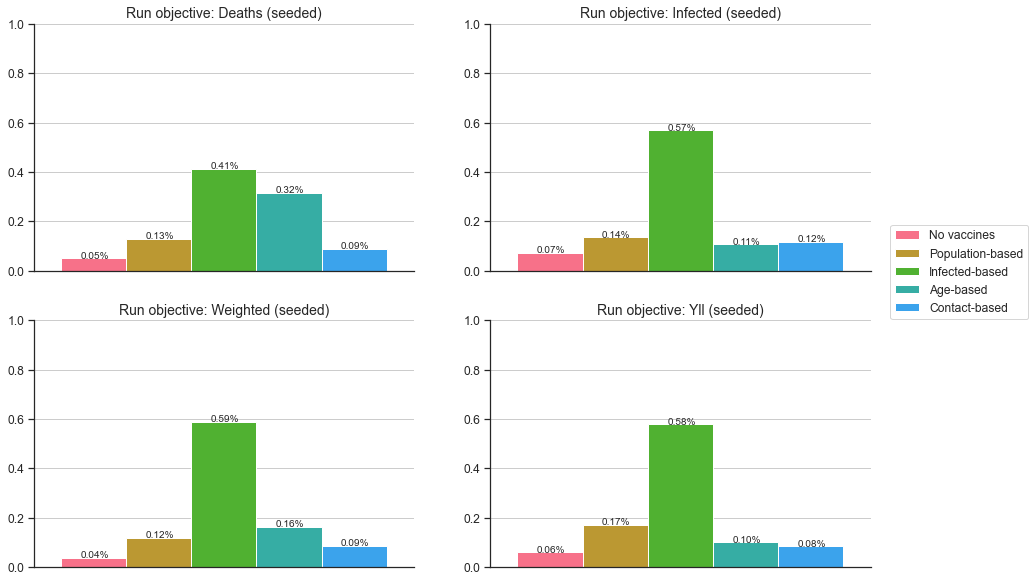

In [14]:
up_run_1 = get_aggregated_trend_policy(pop_1, 0)
up_run_2 = get_aggregated_trend_policy(pop_2, 0)
up_run_3 = get_aggregated_trend_policy(pop_3, 0)
up_run_4 = get_aggregated_trend_policy(pop_4, 0)

plot_trend_policy_weights([up_run_1, up_run_2, up_run_3, up_run_4], ylim=1)

## DOWN

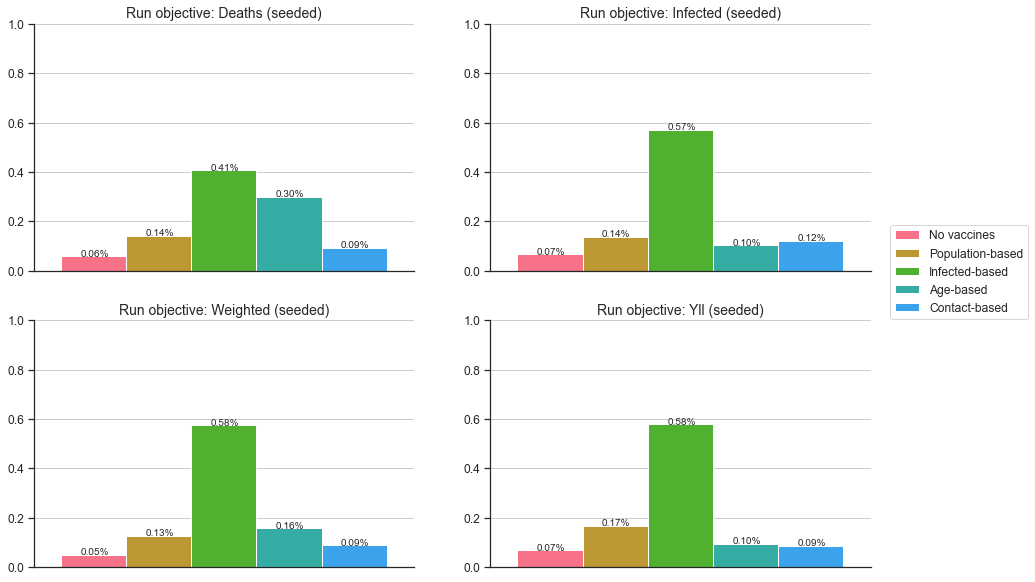

In [15]:
down_run_1 = get_aggregated_trend_policy(pop_1, 1)
down_run_2 = get_aggregated_trend_policy(pop_2, 1)
down_run_3 = get_aggregated_trend_policy(pop_3, 1)
down_run_4 = get_aggregated_trend_policy(pop_4, 1)

plot_trend_policy_weights([down_run_1, down_run_2, down_run_3, down_run_4], ylim=1)

## NEUTRAL

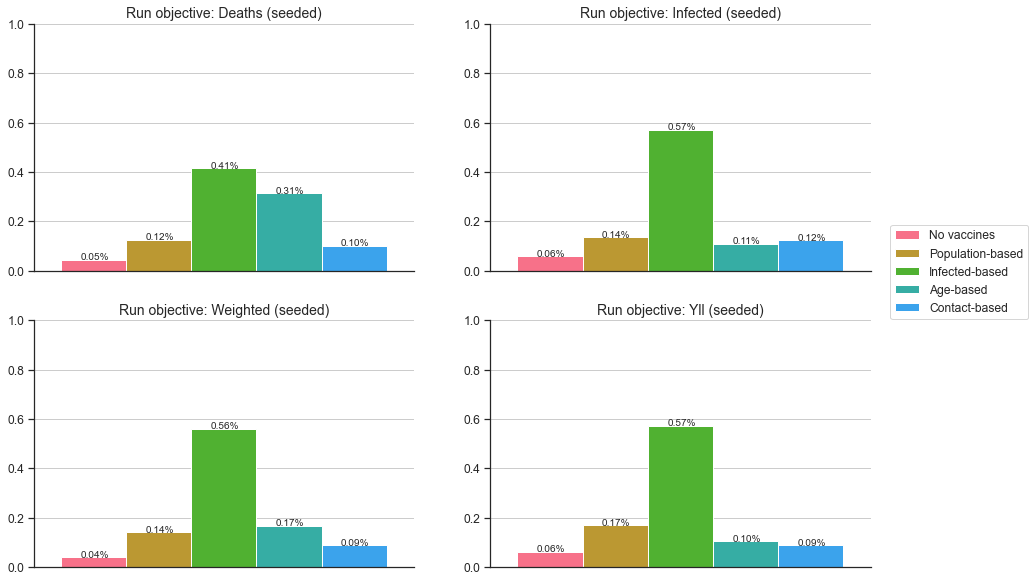

In [16]:
neutral_run_1 = get_aggregated_trend_policy(pop_1, 2)
neutral_run_2 = get_aggregated_trend_policy(pop_2, 2)
neutral_run_3 = get_aggregated_trend_policy(pop_3, 2)
neutral_run_4 = get_aggregated_trend_policy(pop_4, 2)

plot_trend_policy_weights([neutral_run_1, neutral_run_2, neutral_run_3, neutral_run_4], ylim=1)

In [17]:
def plot_all_trends_policy_weights(ETS, title, ylim):
    policies = ("No vaccines", "Population-based", "Infected-based", "Age-based", "Contact-based")
    sns.set(font_scale=1.1)
    sns.set_style("ticks")
    colors = sns.color_palette('husl')
    fig, axs = plt.subplots(ncols=3, figsize=(15,5), sharey=True)
    for i, trend in enumerate(["Up", "Down", "Neutral"]):
        ax = axs[i]
        pd.DataFrame(dict(zip(policies,ETS[i])), index=["Percent"]).plot(kind='bar', color=colors, width=3, ax=ax, legend=False)
        for rect in ax.patches:
            height = rect.get_height()
            width = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()
            label_text = f'{height:.2f}%'
            label_x = x + width / 2 + 0.01
            label_y = y + height + 0.01
            if width > 0:
                ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.grid()
        ax.get_xaxis().set_visible(False)
        ax.set_title(f"{trend}", fontsize=14)
        ax.set_ylim(0, ylim)
    fig.suptitle(f"Run objective: {title.capitalize()}", y=1.01)
    plt.legend(bbox_to_anchor=(1.6, 1))
    plt.show()

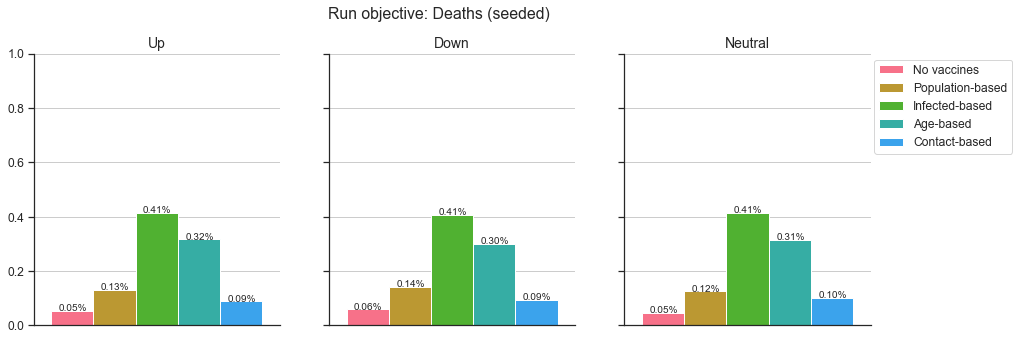

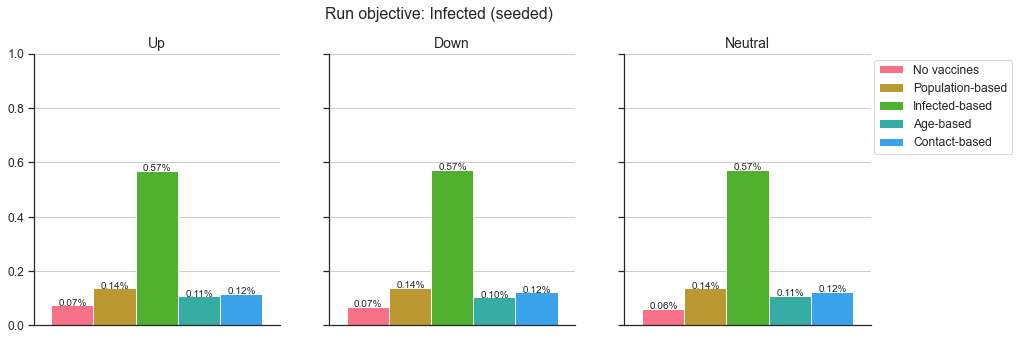

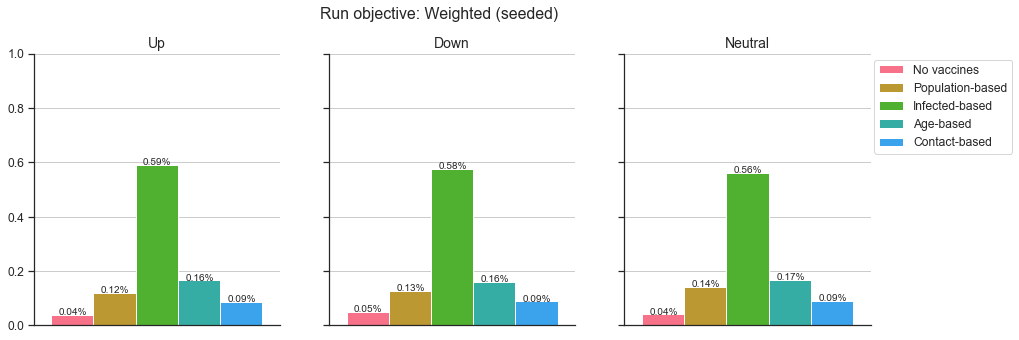

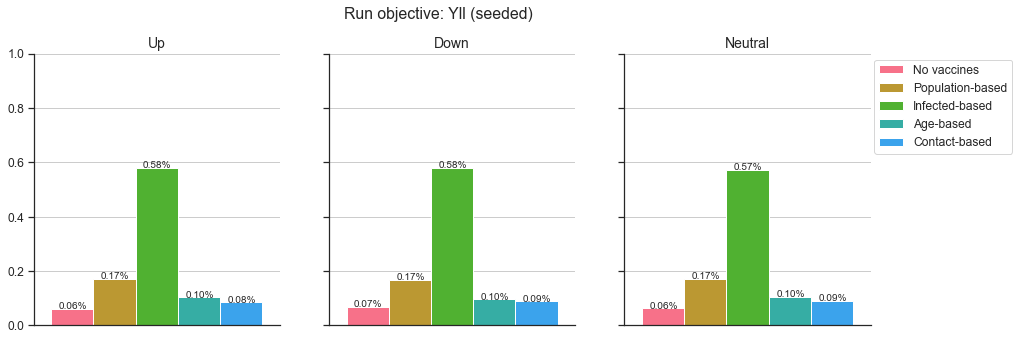

In [18]:
all_ETS = [[up_run_1, down_run_1, neutral_run_1], 
            [up_run_2, down_run_2, neutral_run_2], 
            [up_run_3, down_run_3, neutral_run_3],
            [up_run_4, down_run_4, neutral_run_4]]
run_names = [run_name_1, run_name_2, run_name_3, run_name_4]
for i, ETS in enumerate(all_ETS):
    plot_all_trends_policy_weights(ETS, title=run_names[i], ylim=1)

## Trend count strategy

In [19]:
runs = [run_1, run_2, run_3, run_4]
run_names = [run_name_1, run_name_2, run_name_3, run_name_4]
pops = [pop_1, pop_2, pop_3, pop_4]

def plot_trend_count_policy_weights(ETS, title, ylim):
    policies = ("No vaccines", "Population-based", "Infected-based", "Age-based", "Contact-based")
    sns.set(font_scale=1.1)
    sns.set_style("ticks")
    colors = sns.color_palette('husl')
    fig, axs = plt.subplots(ncols=3, figsize=(15,5), sharey=True)
    for i, trend in enumerate(["First", "Second", "Third"]):
        ax = axs[i]
        pd.DataFrame(dict(zip(policies,ETS[i])), index=["Percent"]).plot(kind='bar', color=colors, width=3, ax=ax, legend=False)
        for rect in ax.patches:
            height = rect.get_height()
            width = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()
            label_text = f'{height:.2f}%'
            label_x = x + width / 2 + 0.01
            label_y = y + height + 0.01
            if width > 0:
                ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.grid()
        ax.get_xaxis().set_visible(False)
        ax.set_title(f"{trend}", fontsize=14)
        ax.set_ylim(0, ylim)
    fig.suptitle(f"Run: {title.capitalize()}", y=1.01)
    plt.legend(bbox_to_anchor=(1.6, 1))
    plt.show()

def get_trend_policy(pop, trend_nr, trend_count):
    ets = (sum([i.genes[trend_nr][trend_count] for i in pop])/len(pop))
    return ets

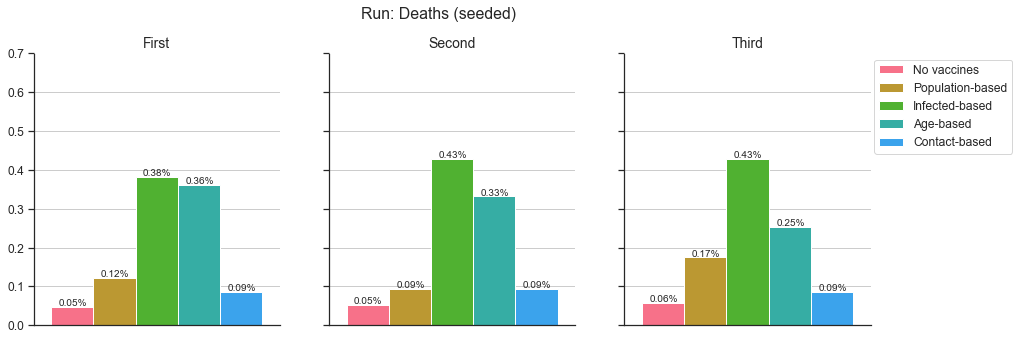

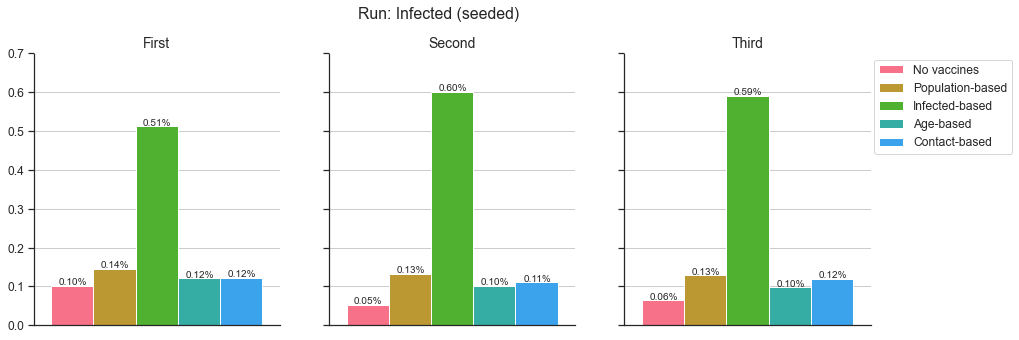

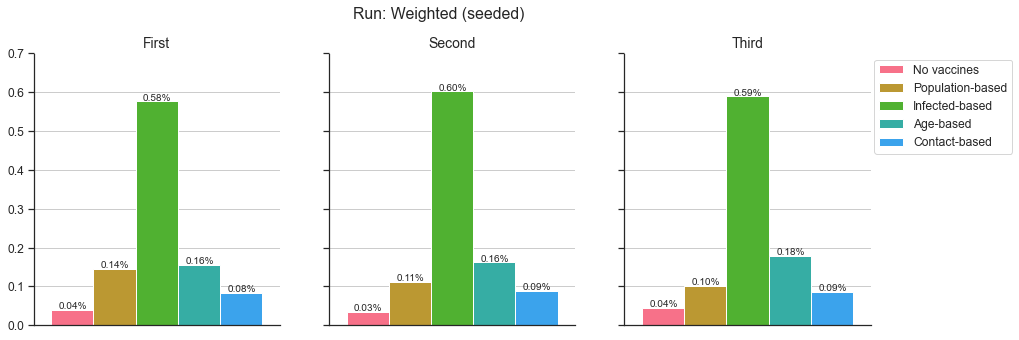

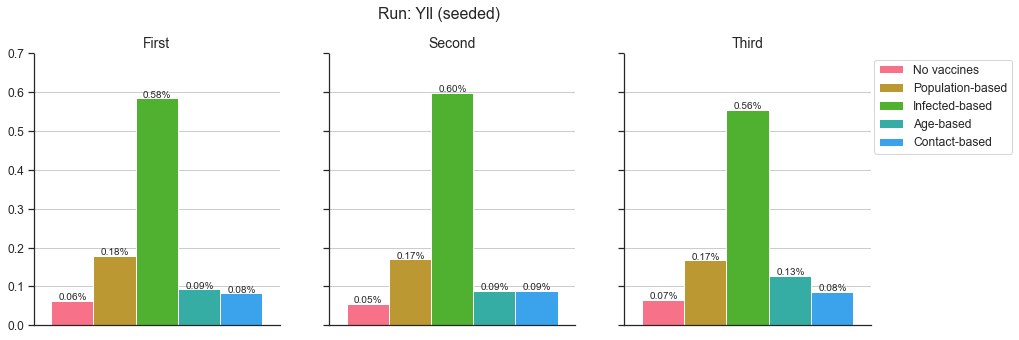

In [20]:
for i, run in enumerate(runs):
    up_1 = get_trend_policy(pops[i], 0, 0)
    up_2 = get_trend_policy(pops[i], 0, 1)
    up_3 = get_trend_policy(pops[i], 0, 2)
    plot_trend_count_policy_weights([up_1, up_2, up_3], run_names[i], 0.7)

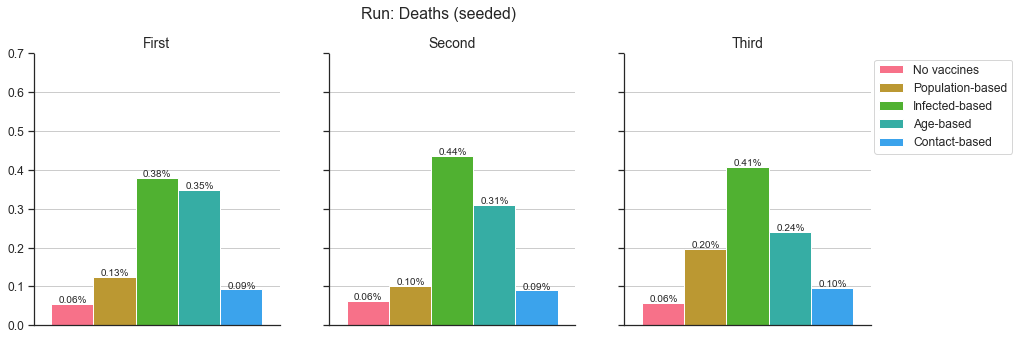

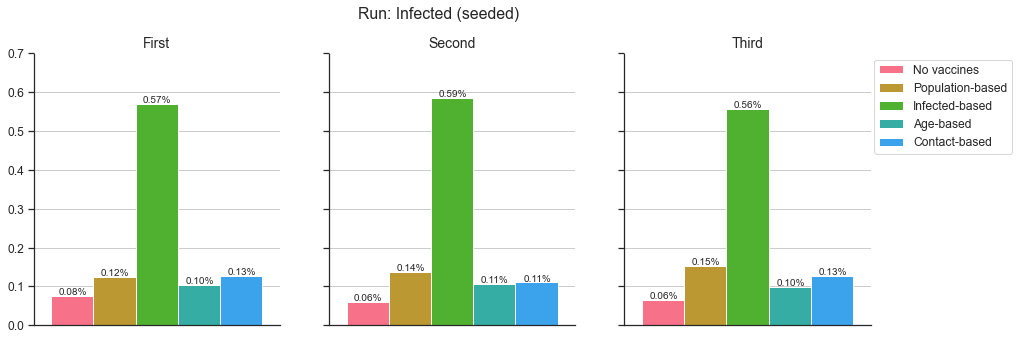

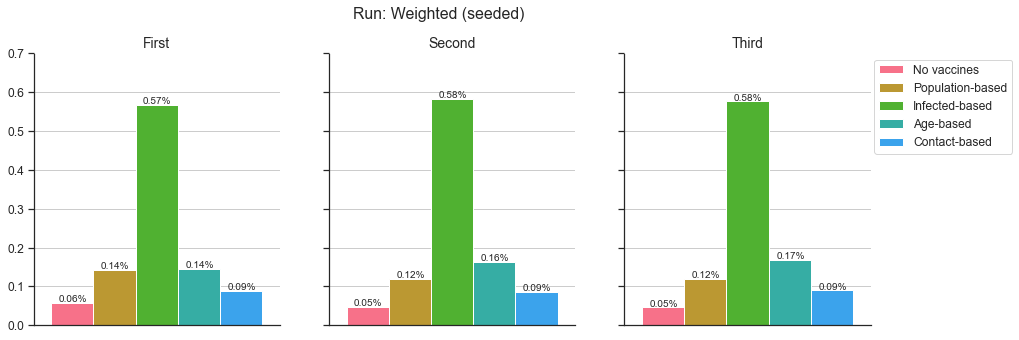

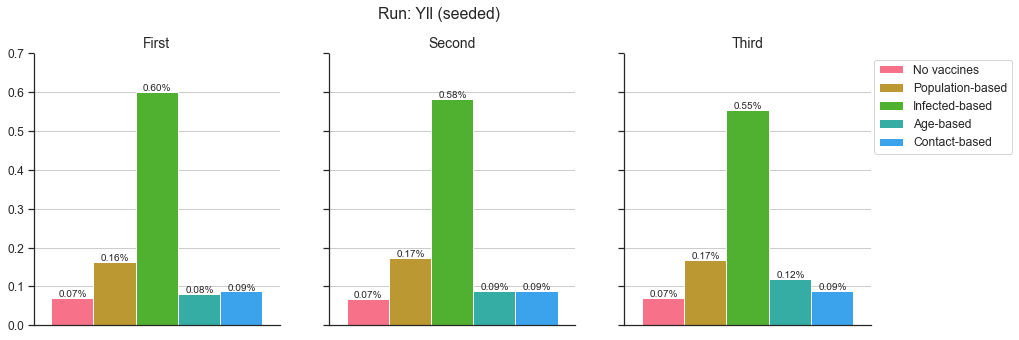

In [21]:
for i, run in enumerate(runs):
    down_1 = get_trend_policy(pops[i], 1, 0)
    down_2 = get_trend_policy(pops[i], 1, 1)
    down_3 = get_trend_policy(pops[i], 1, 2)
    plot_trend_count_policy_weights([down_1, down_2, down_3], run_names[i], 0.7)

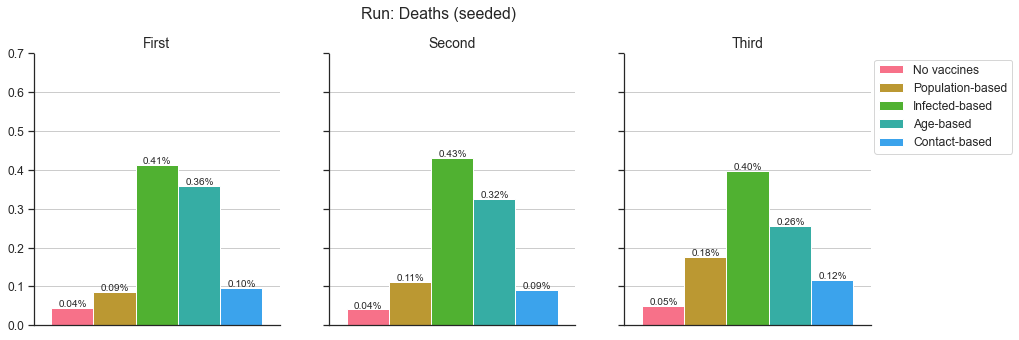

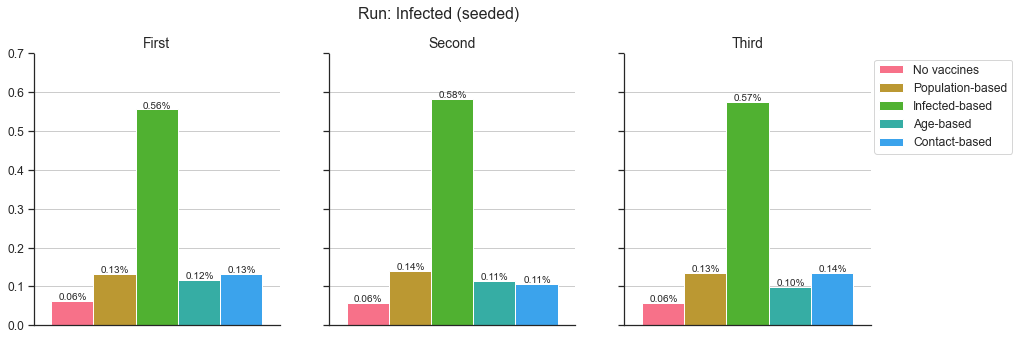

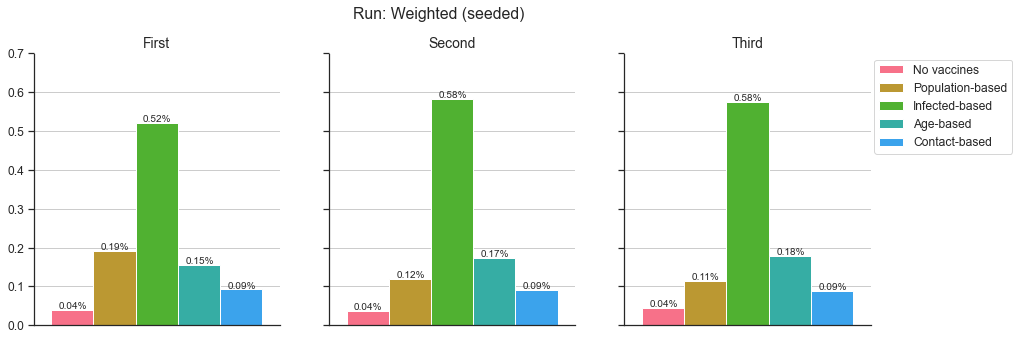

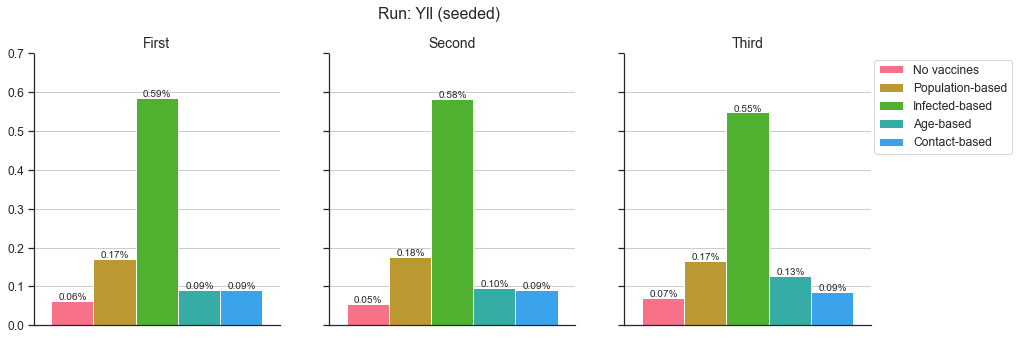

In [22]:
for i, run in enumerate(runs):
    neutral_1 = get_trend_policy(pops[i], 2, 0)
    neutral_2 = get_trend_policy(pops[i], 2, 1)
    neutral_3 = get_trend_policy(pops[i], 2, 2)
    plot_trend_count_policy_weights([neutral_1, neutral_2, neutral_3], run_names[i], 0.7)

## Development

In [23]:
def load_generation_pop(run_nr, gen):
    individuals = utils.read_pickle(f"{dir_path + paths[run_nr-1]}/individuals/individuals_{gen}.pkl")
    return individuals

In [24]:
policies = ["No vaccines", "Population-based", "Infection-based", "Age-based", "Contact-based"]
def get_generation_ets(run_nr):
    df = pd.DataFrame(columns=policies + ["Trend", "Generation"])
    for gen in range(max_generations):
        pop = load_generation_pop(run_nr, gen)
        up = get_aggregated_trend_policy(pop, 0)
        row = dict(zip(policies, up))
        row["Trend"] = "Up"
        row["Generation"] = gen
        df = df.append(row, ignore_index=True)
        down = get_aggregated_trend_policy(pop, 1)
        row = dict(zip(policies, down))
        row["Trend"] = "Down"
        row["Generation"] = gen
        df = df.append(row, ignore_index=True)
        neutral = get_aggregated_trend_policy(pop, 2)
        row = dict(zip(policies, neutral))
        row["Trend"] = "Neutral"
        row["Generation"] = gen
        df = df.append(row, ignore_index=True)
    df.set_index(["Generation", "Trend"], inplace=True)
    return df

In [25]:
fig, axs = plt.subplots(ncols=5, figsize=(20,5), sharey=True)
for i, p in enumerate(policies):
    ax = axs[i]
    df.unstack(level=1)[p].plot(ax=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid()
    ax.set_title(p)
plt.show()

NameError: name 'df' is not defined